In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-v0_8-whitegrid')
# plt.style.available

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


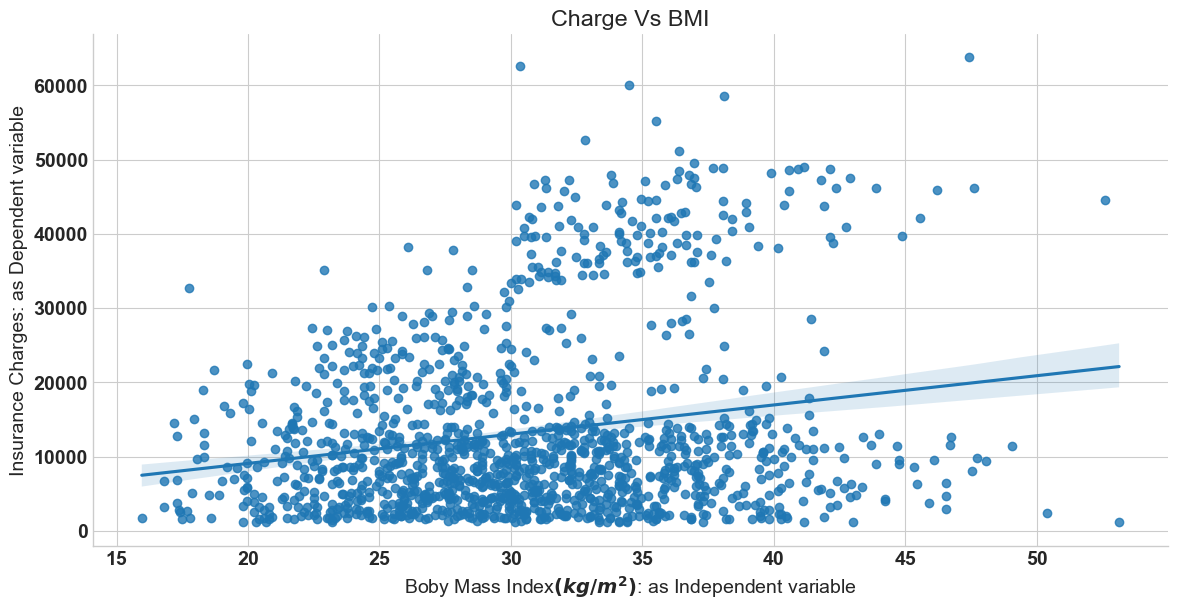

In [3]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


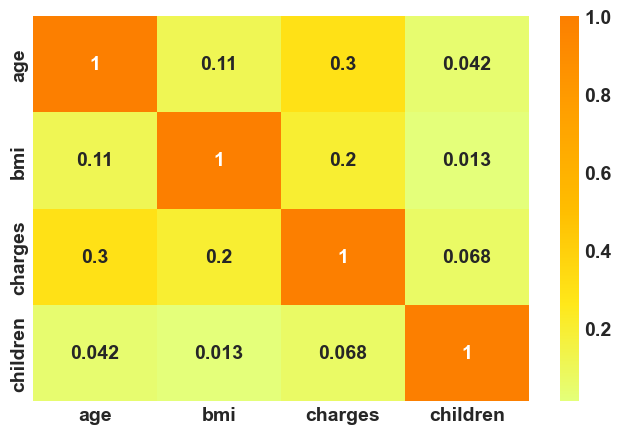

In [6]:
# correlation plot
df1 = df[['age', 'bmi', 'charges', 'children']]
corr = df1.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [7]:
# Dummy variable
categorical_columns = ['sex', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [8]:
df_encode.columns.values

array(['age', 'bmi', 'children', 'charges', 'OHE_male', 'OHE_yes',
       'OHE_northwest', 'OHE_southeast', 'OHE_southwest'], dtype=object)

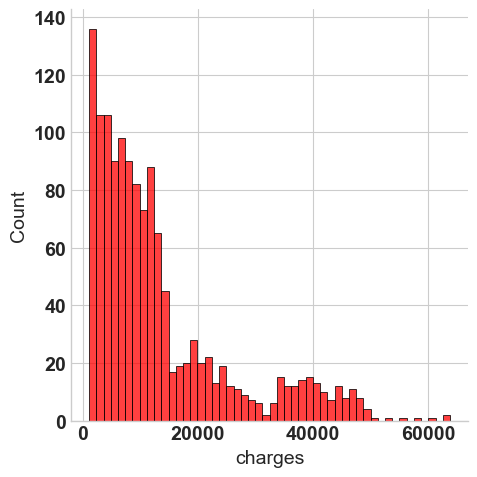

In [9]:
sns.displot(df['charges'],bins=50,color='r')

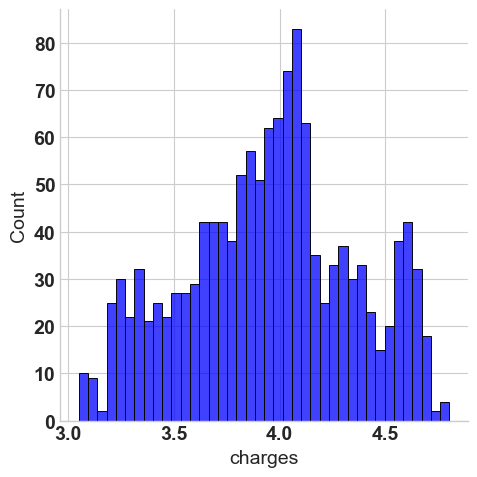

In [10]:
sns.displot(np.log10(df['charges']),bins=40,color='b')

In [11]:
df_encode['charges'] = np.log(df_encode['charges'])

In [12]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train) 

LinearRegression()

In [15]:
from sklearn import metrics

In [16]:
print('r squared error: ',metrics.r2_score(y_train, reg.predict(X_train)))
print('mean absolute error: ',metrics.mean_absolute_error(y_train, reg.predict(X_train)))

r squared error:  0.7623624821410289
mean absolute error:  0.28300350464187096


In [17]:
pred = reg.predict(X_test)
print('r squared error: ',metrics.r2_score(y_test, pred))
print('mean absolute error: ',metrics.mean_absolute_error(y_test, pred))

r squared error:  0.7767840303618613
mean absolute error:  0.281285598719145
